<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-randomness-to-estimate-a-'difficult'-surface" data-toc-modified-id="Using-randomness-to-estimate-a-'difficult'-surface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using randomness to estimate a <em>'difficult'</em> surface</a></span></li><li><span><a href="#Check-if-it-works" data-toc-modified-id="Check-if-it-works-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check if it works</a></span></li><li><span><a href="#Something-harder...Batman" data-toc-modified-id="Something-harder...Batman-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Something harder...Batman</a></span></li><li><span><a href="#The-logo-in-equations" data-toc-modified-id="The-logo-in-equations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The logo in equations</a></span></li><li><span><a href="#What-if-the-points-were-no-so-random?" data-toc-modified-id="What-if-the-points-were-no-so-random?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What if the points were no so random?</a></span><ul class="toc-item"><li><span><a href="#Getting-into-trouble" data-toc-modified-id="Getting-into-trouble-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Getting into trouble</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Generic-code" data-toc-modified-id="Generic-code-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Generic code</a></span></li><li><span><a href="#Getting-points-of-a-figure-patch" data-toc-modified-id="Getting-points-of-a-figure-patch-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Getting points of a figure patch</a></span></li><li><span><a href="#Example-of-complexity-of-MatPlotLib" data-toc-modified-id="Example-of-complexity-of-MatPlotLib-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Example of complexity of MatPlotLib</a></span></li><li><span><a href="#DIY-meshgrid" data-toc-modified-id="DIY-meshgrid-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>DIY meshgrid</a></span></li></ul></li></ul></div>

# Monte Carlo Method, or using chance to solve difficult problems

A problem can be intractable; the problem can be solved in theory but in practice it takes too many resources to be useful. The Monte Carlo method provides an approximation of a parameter using randomness where calculating it directly is impossible or prohibitively expensive; i.e. intractable

https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50

## Using randomness to estimate a *'difficult'* surface

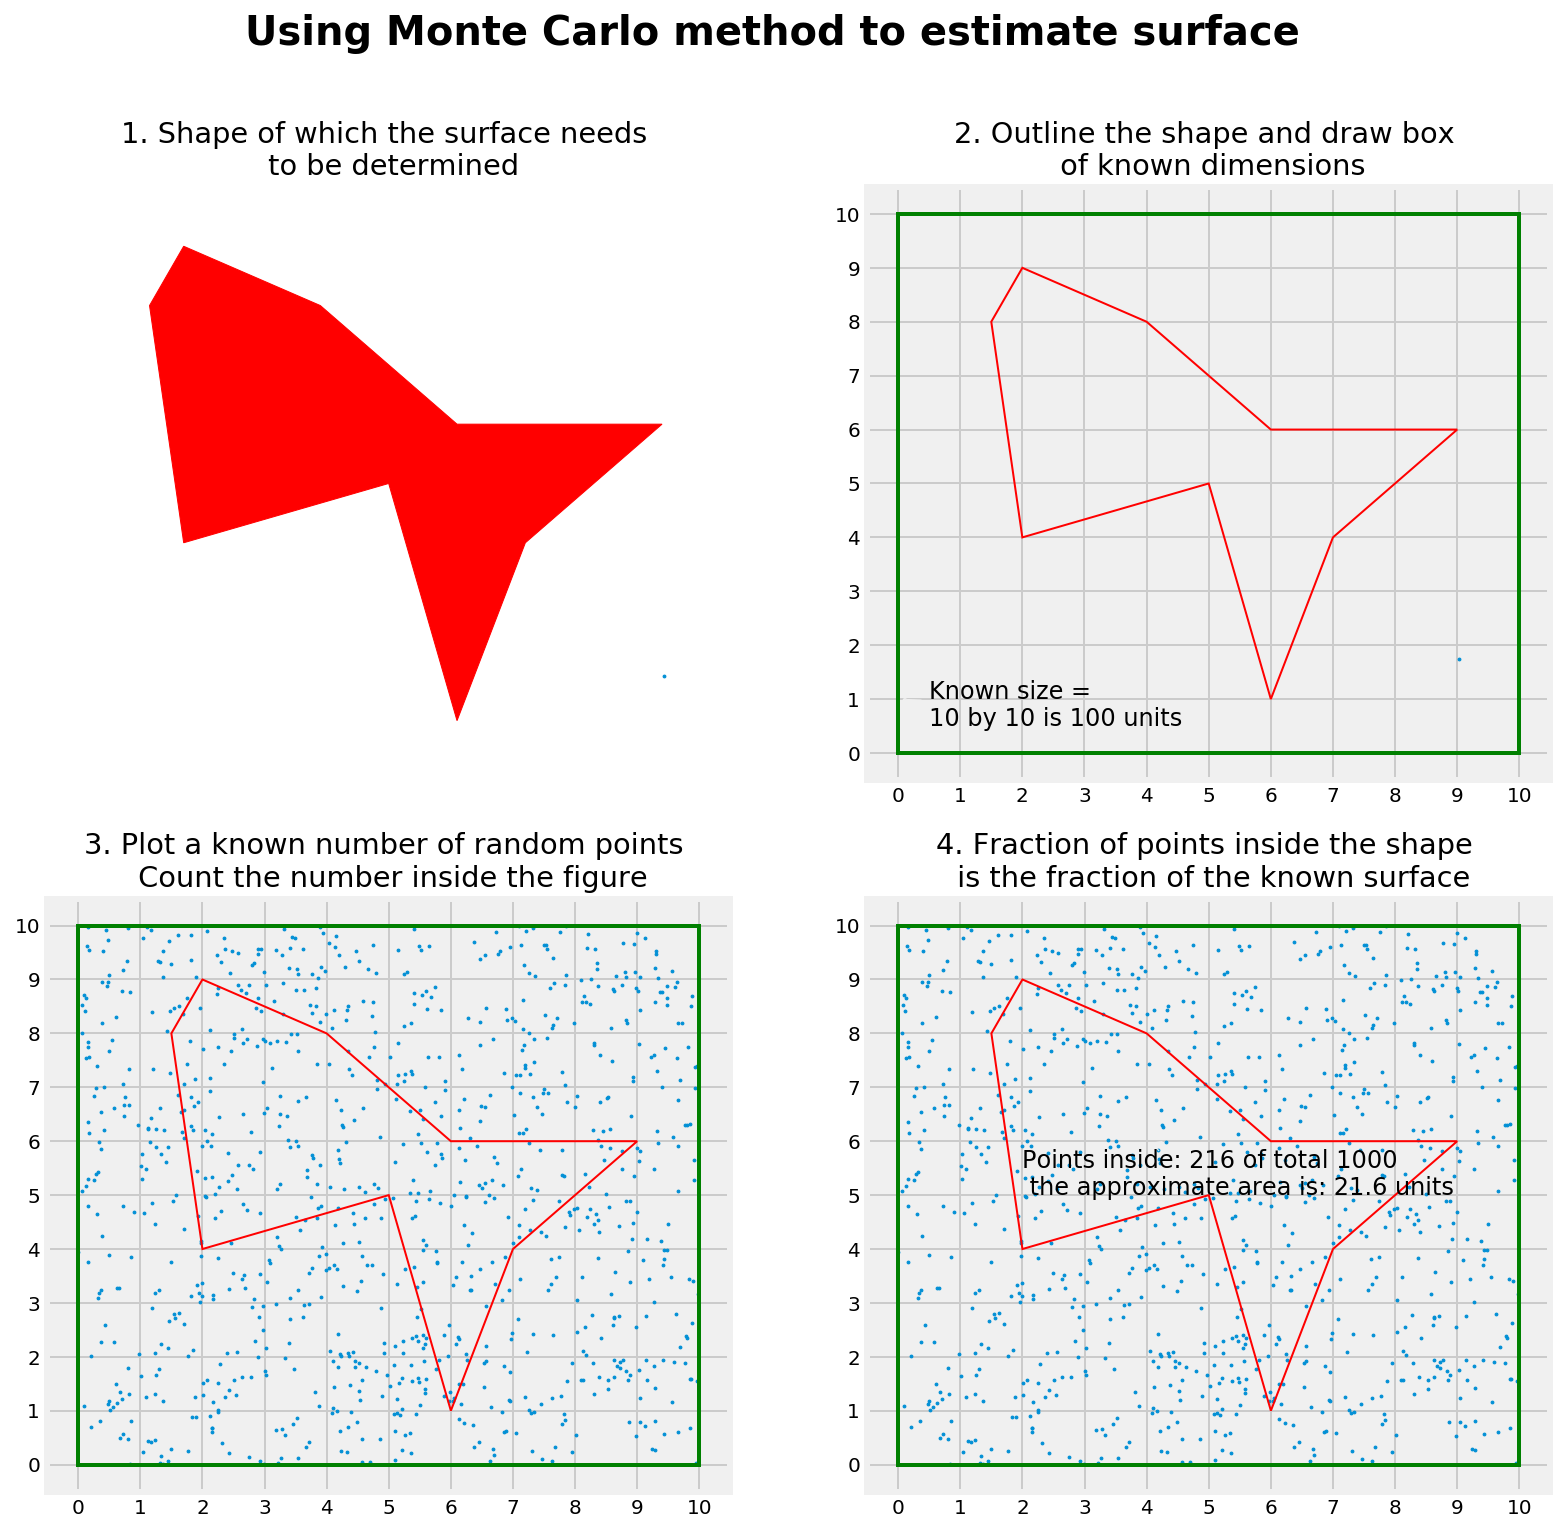

the proportion of points in the area of the figure is :0.216
the approximate area is therefore: 21.6 units


In [49]:
import matplotlib.path as mpltPath
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

# set up data
np.random.seed(2019)
npts = 1000
start = 0
end = 10
# number of random points
x = np.random.uniform(start, end, npts)
y = np.random.uniform(start, end, npts)
xy = list(zip(x, y))
points = xy

# draw the shape (one per subplot required)
ppoints = [[2, 4], [1.5, 8], [2, 9], [4, 8],
           [6, 6], [9, 6], [7, 4], [6, 1], [5, 5]]
polygon1 = Polygon(ppoints, closed=True, fill=True, fc='red', edgecolor='r')
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon3 = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon4 = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)

# draw the box
rectangle1 = Rectangle(xy=(0, 0), width=10, height=10,
                       lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0, 0), width=10, height=10,
                       lw=2, edgecolor='green', fill=False)
rectangle3 = Rectangle(xy=(0, 0), width=10, height=10,
                       lw=2, edgecolor='green', fill=False)

# determine path of the shape and check number of points

path = mpltPath.Path(ppoints)
inside = path.contains_points(points)

# determine area
area = (end-start)*(end-start)
areafrac = (sum(inside*1)/len(points))

# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].add_patch(polygon1)
ax[0, 0].scatter(x[0], y[0], s=2)
# ax[0,0].patch.set_facecolor('red')
ax[0, 0].grid(False)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].set_facecolor('white')
ax[0, 0].set_xlim([0, 10])
ax[0, 0].set_ylim([0, 10])
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].set_title('1. Shape of which the surface needs \n to be determined')

ax[0, 1].add_patch(polygon2)
ax[0, 1].add_patch(rectangle1)
ax[0, 1].scatter(x[0], y[0], s=2)
ax[0, 1].set_title('2. Outline the shape and draw box \n of known dimensions')
ax[0, 1].set_xticks([xt for xt in range(0, 11)])
ax[0, 1].set_yticks([yt for yt in range(0, 11)])
ax[0, 1].annotate(
    f'Known size = \n{end-start} by {end-start} is {(end-start)*(end-start)} units',
    xy=(0, 1), arrowprops=dict(arrowstyle='->'), xytext=(.5, .5), fontsize=12)

ax[1, 0].add_patch(polygon3)
ax[1, 0].add_patch(rectangle2)
ax[1, 0].scatter(x, y, s=2)
ax[1, 0].set_xticks([xt for xt in range(0, 11)])
ax[1, 0].set_yticks([yt for yt in range(0, 11)])

ax[1, 0].set_title(
    '3. Plot a known number of random points \n Count the number inside the figure')

ax[1, 1].add_patch(polygon4)
ax[1, 1].add_patch(rectangle3)
ax[1, 1].scatter(x, y, s=2)
ax[1, 1].set_xticks([xt for xt in range(0, 11)])
ax[1, 1].set_yticks([yt for yt in range(0, 11)])
ax[1, 1].set_title(
    '4. Fraction of points inside the shape \n is the fraction of the known surface')
ax[1, 1].annotate(
    f'Points inside: {sum(inside*1)} of total {npts}\n the approximate area is: {areafrac*area} units',
    xy=(4, 6), arrowprops=dict(arrowstyle='->'), xytext=(2, 5), fontsize=12)
# plt.axis('scaled')
plt.suptitle('Using Monte Carlo method to estimate surface',
             fontsize=20, fontweight='bold')
plt.show()

print(f'the proportion of points in the area of the figure is :{areafrac}')
print(f'the approximate area is therefore: {areafrac*area} units')

## Check if it works

How good is this? Well, check it with something of which the surface is known, for instance a simple square shape.

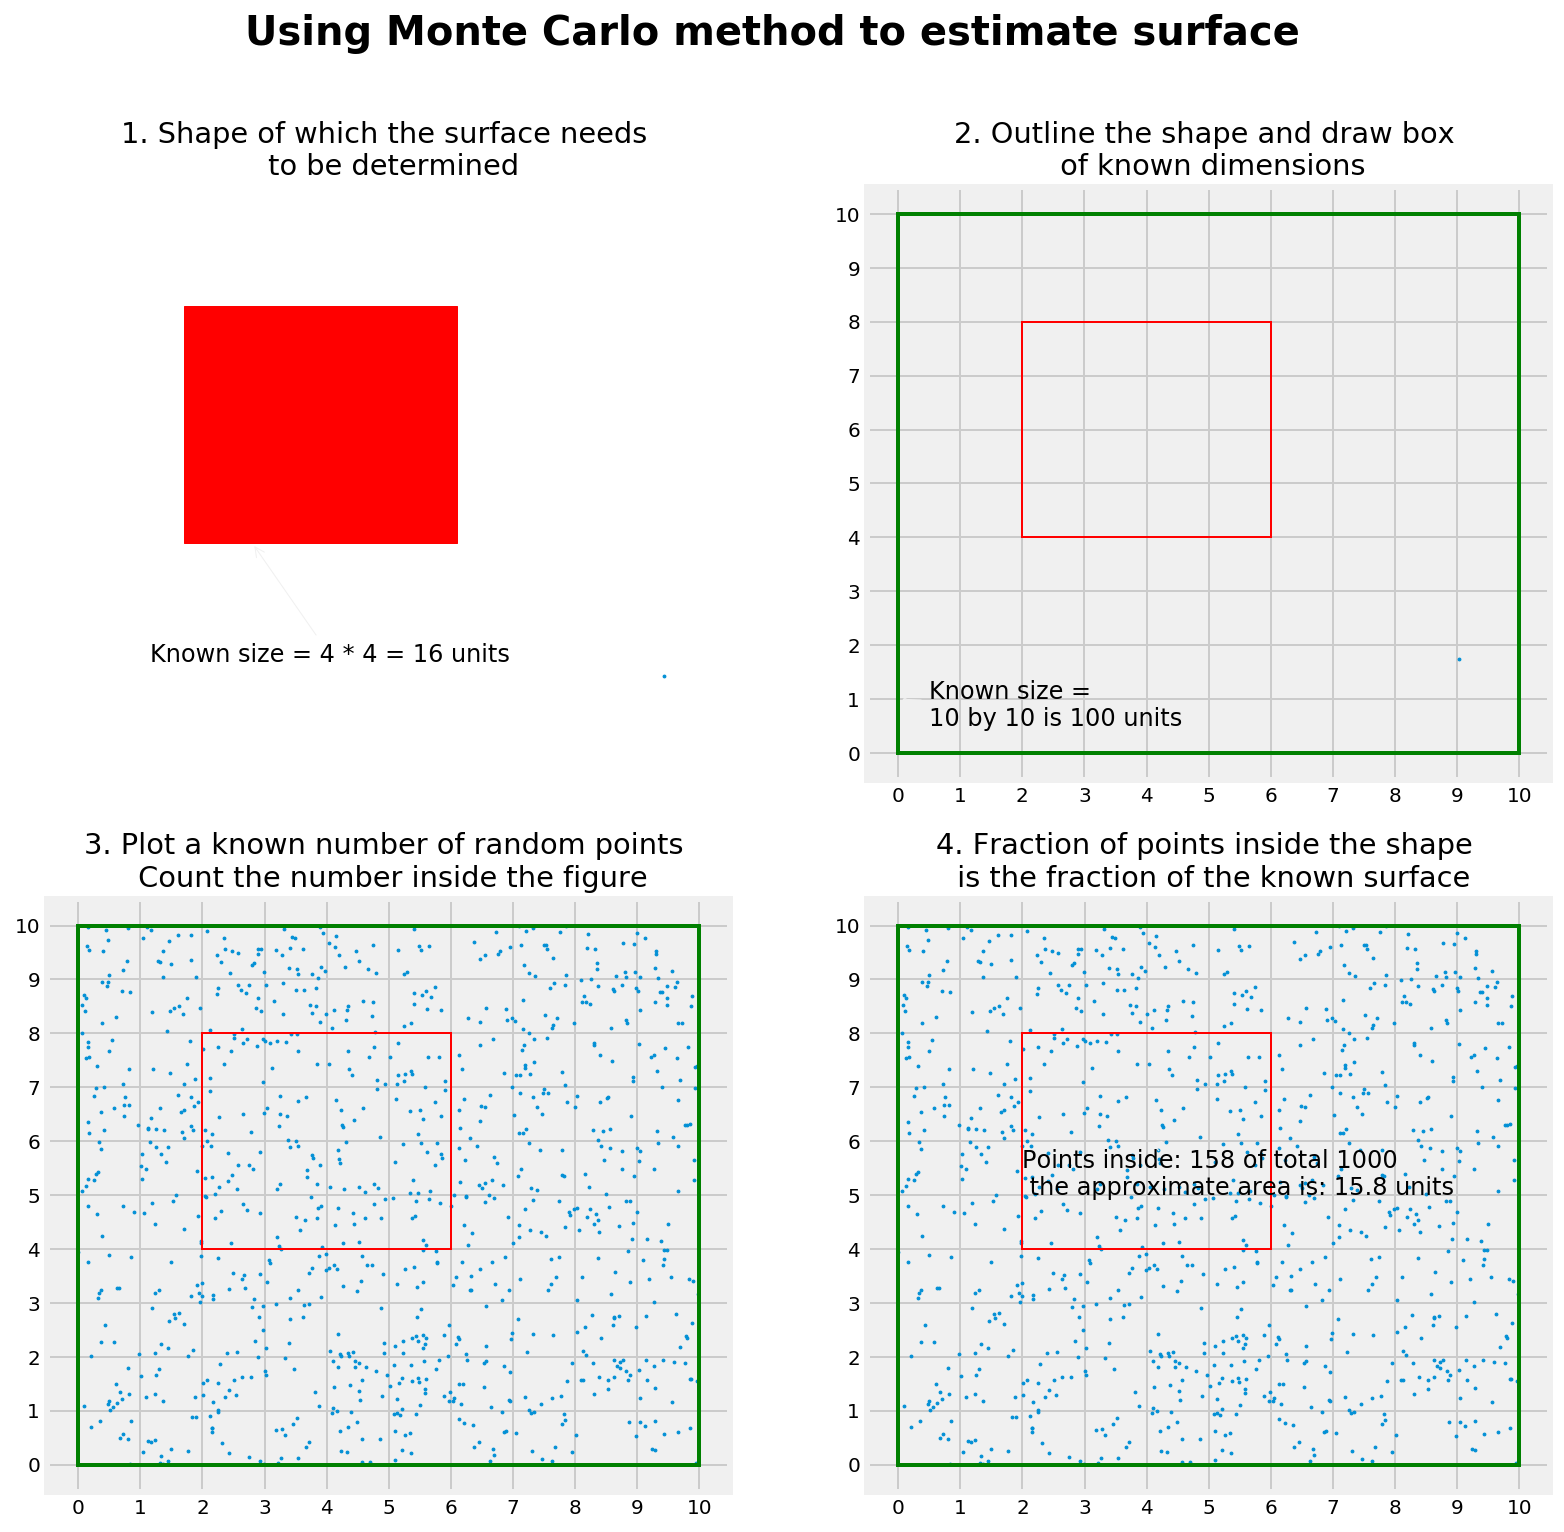

the proportion of points in the area of the figure is :0.158
the approximate area is therefore: 15.8 units


In [3]:
import matplotlib.path as mpltPath
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

#set up data
np.random.seed(2019)
npts = 1000
start = 0
end = 10
#number of random points
x = np.random.uniform(start, end, npts)
y = np.random.uniform(start, end, npts)
xy=list(zip(x,y))
points = xy

#draw the shape (one per subplot required)
ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon = Polygon(ppoints, closed=True, fill=None, edgecolor='r')
polygon1= Polygon(ppoints, closed=True, fill=True, fc='red',edgecolor='r')
polygon2= Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon3= Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon4 = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)

#draw the box
rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle3 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

#determine path of the shape and check number of points 

path = mpltPath.Path(ppoints)
inside = path.contains_points(points)

#determine area
area= (end-start)*(end-start)
areafrac=(sum(inside*1)/len(points))

# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].add_patch(polygon1)
ax[0,0].scatter(x[0], y[0], s=2)
# ax[0,0].patch.set_facecolor('red')
ax[0,0].grid(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_facecolor('white')
ax[0,0].set_xlim([0,10])
ax[0,0].set_ylim([0,10])
ax[0,0].annotate(
        f'Known size = 4 * 4 = 16 units',
        xy=(3,4), arrowprops=dict(arrowstyle='->'), xytext=(1.5, 2), fontsize=12)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].set_title('1. Shape of which the surface needs \n to be determined')

ax[0,1].add_patch(polygon2)
ax[0,1].add_patch(rectangle1)
ax[0,1].scatter(x[0], y[0], s=2)
ax[0,1].set_title('2. Outline the shape and draw box \n of known dimensions')
ax[0,1].set_xticks([xt for xt in range (0,11)])
ax[0,1].set_yticks([yt for yt in range (0,11)])
ax[0,1].annotate(
        f'Known size = \n{end-start} by {end-start} is {(end-start)*(end-start)} units',
        xy=(0, 1), arrowprops=dict(arrowstyle='->'), xytext=(.5,.5), fontsize=12)

ax[1,0].add_patch(polygon3)
ax[1,0].add_patch(rectangle2)
ax[1,0].scatter(x, y, s=2)
ax[1,0].set_xticks([xt for xt in range (0,11)])
ax[1,0].set_yticks([yt for yt in range (0,11)])

ax[1,0].set_title('3. Plot a known number of random points \n Count the number inside the figure')

ax[1,1].add_patch(polygon4)
ax[1,1].add_patch(rectangle3)
ax[1,1].scatter(x, y, s=2)
ax[1,1].set_xticks([xt for xt in range (0,11)])
ax[1,1].set_yticks([yt for yt in range (0,11)])
ax[1,1].set_title('4. Fraction of points inside the shape \n is the fraction of the known surface')
ax[1,1].annotate(
        f'Points inside: {sum(inside*1)} of total {npts}\n the approximate area is: {areafrac*area} units',
        xy=(4, 6), arrowprops=dict(arrowstyle='->'), xytext=(2, 5), fontsize=12)
# plt.axis('scaled')
plt.suptitle('Using Monte Carlo method to estimate surface', fontsize=20, fontweight='bold')
plt.show()

print(f'the proportion of points in the area of the figure is :{areafrac}')
print(f'the approximate area is therefore: {areafrac*area} units')

## Something harder...Batman

This notebook was triggered by the blog above. Promising that estimating the area of the batman logo would be a breeze....

## The logo in equations

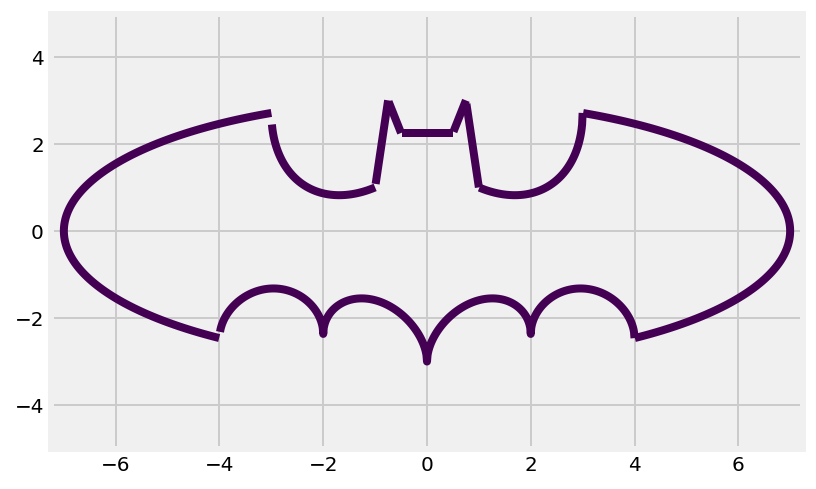

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 16 09:30:30 2011

Python Batman Equation

@author: Trae Blain
"""
from __future__ import division
import matplotlib.pyplot as plt
from numpy import sqrt #original code had 'from scipy import sqrt'
from numpy import meshgrid
from numpy import arange
import numpy as np
np.seterr(divide='ignore', invalid='ignore') #surpresses error message due to division by 0 which may occur with random numbers

xs = arange(-7.25, 7.25, 0.01)
ys = arange(-5, 5, 0.01)
x, y = meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)

#eq1 = ((x/7.0)**2.0*sqrt(abs(abs(x)-3.0)/(abs(x)-3.0))+(y/3.0)**2.0*sqrt(abs(y+3.0/7.0*sqrt(33.0))/(y+3.0/7.0*sqrt(33.0)))-1.0)

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    batmantotal = plt.contour(x, y, f, [0])

plt.show()

Applying the same method as above, i.e. creating a shape patch, does not work:

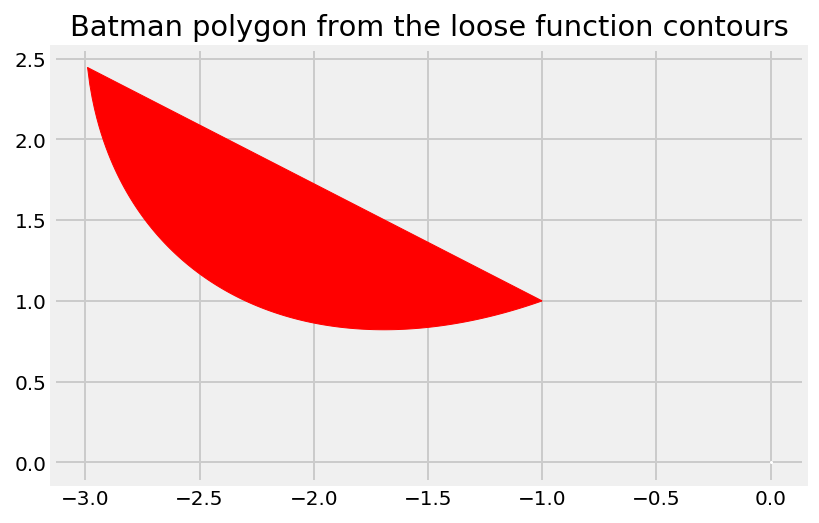

In [5]:
# get the points
dattotal= batmantotal.allsegs[0][0]
# get into a list
ppointstotal=[l.tolist() for l in dattotal]
# make into a closed polygon
polygontotal= Polygon(ppointstotal, closed=True, fill=True, fc='red',edgecolor='r')

fig, ax = plt.subplots()
ax.add_patch(polygontotal)
ax.scatter(0, 0, s=1, c = 'white')
ax.set_title('Batman polygon from the loose function contours')

plt.show()

a little more needs to be done

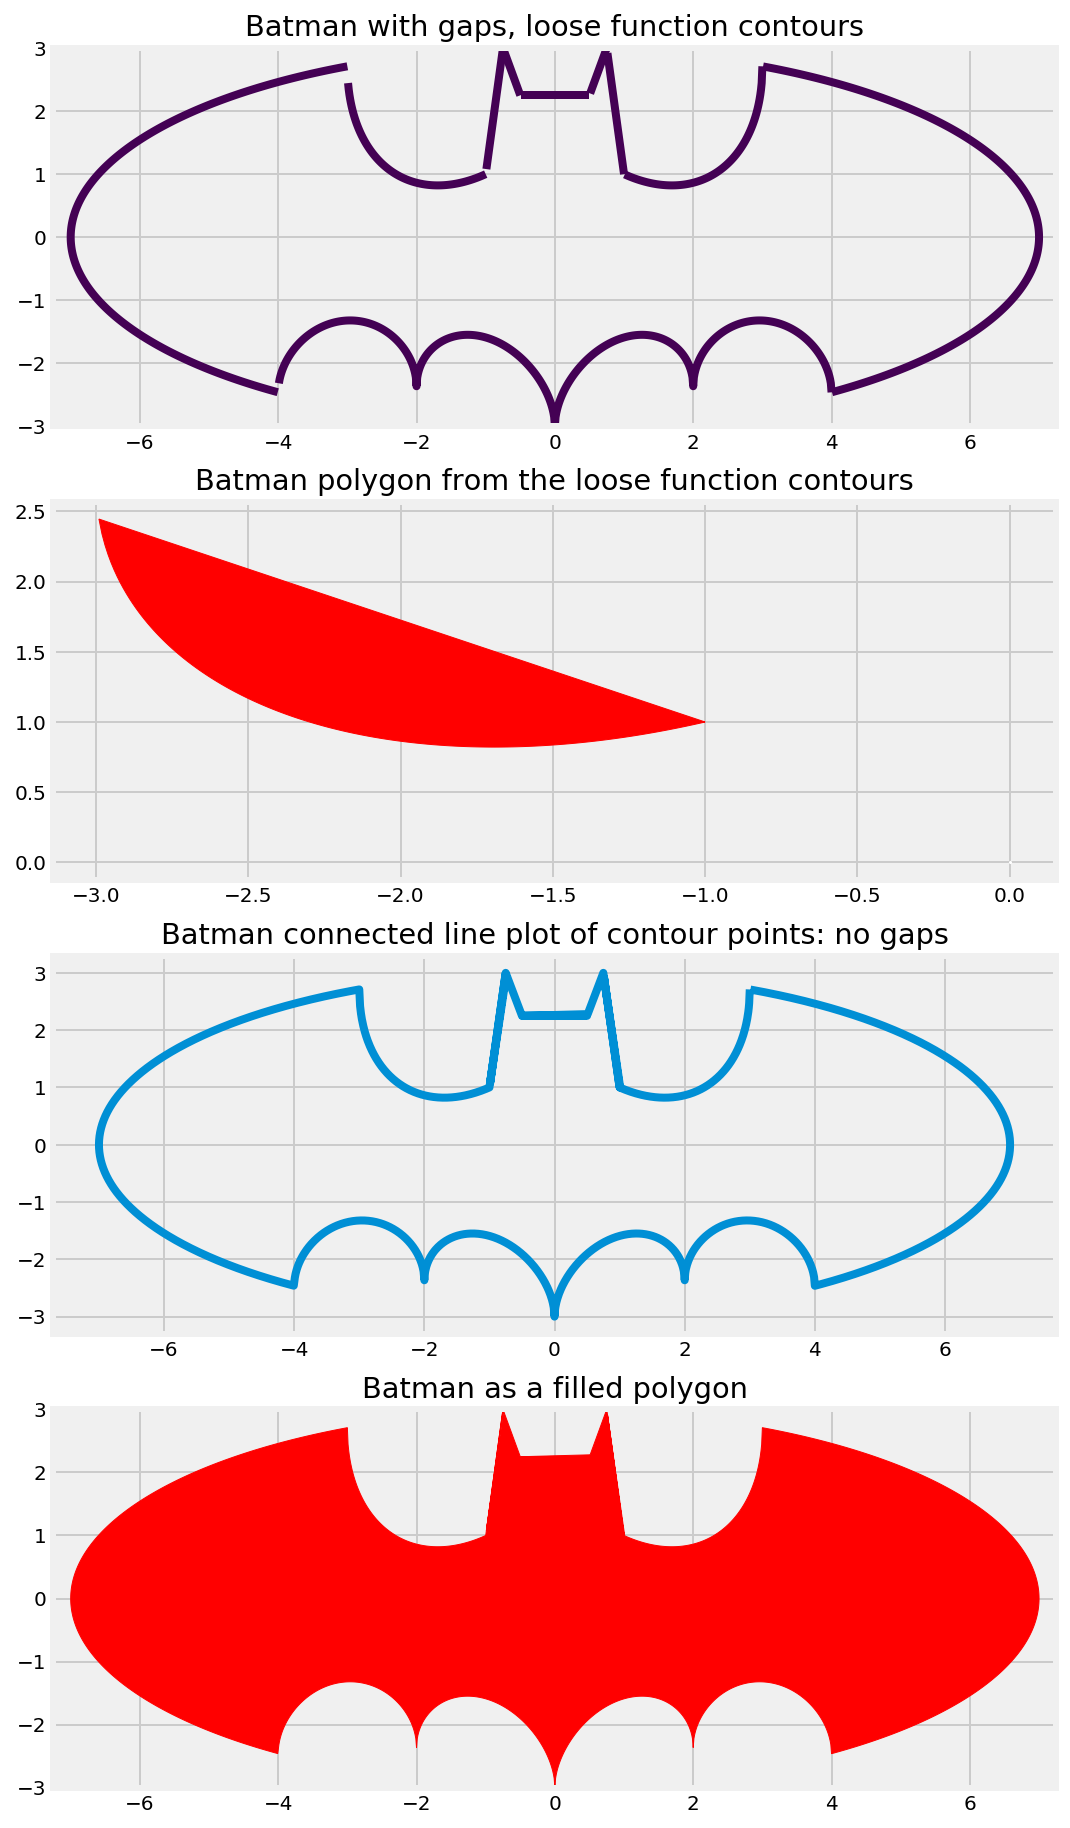

In [6]:
# -*- coding: utf-8 -*-
"""

Equation code from:
Python Batman Equation

@author: Trae Blain

all the rest:
@author: Maarten Kool
"""
from __future__ import division
import matplotlib.pyplot as plt
from numpy import sqrt #originally had from scipy import sqrt
from numpy import meshgrid
from numpy import arange

xs = arange(-7.25, 7.25, 0.01)
ys = arange(-5, 5, 0.01)
x, y = meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)
# 


fig, ax = plt.subplots(4, figsize=(8,16))

#creating the contour for each equation
# not looping to clearly show what I am doing
batman1 = ax[0].contour(x, y, eq1, [0])
batman2 = ax[0].contour(x, y, eq2, [0])
batman3 = ax[0].contour(x, y, eq3, [0])
batman4 = ax[0].contour(x, y, eq4, [0])
batman5 = ax[0].contour(x, y, eq5, [0])
batman6 = ax[0].contour(x, y, eq6, [0])

ax[0].set_ylim([-3,3])
ax[0].set_title('Batman with gaps, loose function contours')

#running the original function and turning it into a polygon

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    batmantotal = plt.contour(x, y, f, [0], linewidths=0)
    
dattotal= batmantotal.allsegs[0][0]
ppointstotal=[l.tolist() for l in dattotal]
polygontotal= Polygon(ppointstotal, closed=True, fill=True, fc='red',edgecolor='r')

#plotting the polygon
ax[1].add_patch(polygontotal)
ax[1].scatter(0, 0, s=1, c = 'white')
ax[1].set_title('Batman polygon from the loose function contours')

# extracting contourpoints coordinates, segment by segment

dat0= batman1.allsegs[0][0] #this function creates 2 segments
# plt.plot(dat0[:,0],dat0[:,1])

dat1= batman1.allsegs[0][1] #this function creates 2 segments
# plt.plot(dat1[:,0],dat0[:,1])

dat2= batman2.allsegs[0][0]
# plt.plot(dat2[:,0],dat2[:,1])

dat3= batman3.allsegs[0][0] #this function creates 2 segments
# plt.plot(dat3[:,0],dat3[:,1])

dat4= batman3.allsegs[0][1] #this function creates 2 segments
# plt.plot(dat4[:,0],dat4[:,1])

dat5= batman4.allsegs[0][0] #this function creates 2 segments
# plt.plot(dat5[:,0],dat5[:,1])

dat6= batman4.allsegs[0][1] #this function creates 2 segments
# plt.plot(dat6[:,0],dat6[:,1])

dat7= batman5.allsegs[0][0]
# plt.plot(dat7[:,0],dat7[:,1])

dat8= batman6.allsegs[0][0] #this function creates 2 segments
# plt.plot(dat8[:,0],dat8[:,1])

dat9= batman6.allsegs[0][1] #this function creates 2 segments
# plt.plot(dat9[:,0],dat9[:,1])

#Creating a single list of points
#[::-1] when segment needs to be plotted in reverse order
ppoints=[l.tolist() for l in dat1]+\
[l.tolist() for l in dat2]+\
[l.tolist() for l in dat0]+\
[l.tolist() for l in dat8[::-1]]+\
[l.tolist() for l in dat4]+\
[l.tolist() for l in dat5[::-1]]+\
[l.tolist() for l in dat7]+\
[l.tolist() for l in dat6[::-1]]+\
[l.tolist() for l in dat3]+\
[l.tolist() for l in dat9[::-1]]

# Creating a line plot which does not have any gaps

x_ = [x[0] for x in ppoints]
y_ = [x[1] for x in ppoints]
ax[2].plot(x_,y_)
ax[2].set_title('Batman connected line plot of contour points: no gaps')

polygon1= Polygon(ppoints, closed=True, fill=True, fc='red',edgecolor='r')
ax[3].add_patch(polygon1)
ax[3].scatter(0, 0, s=1, c = 'white')
ax[3].set_title('Batman as a filled polygon')
ax[3].set_ylim(-3,3)

plt.show()

No we can estimate the surface

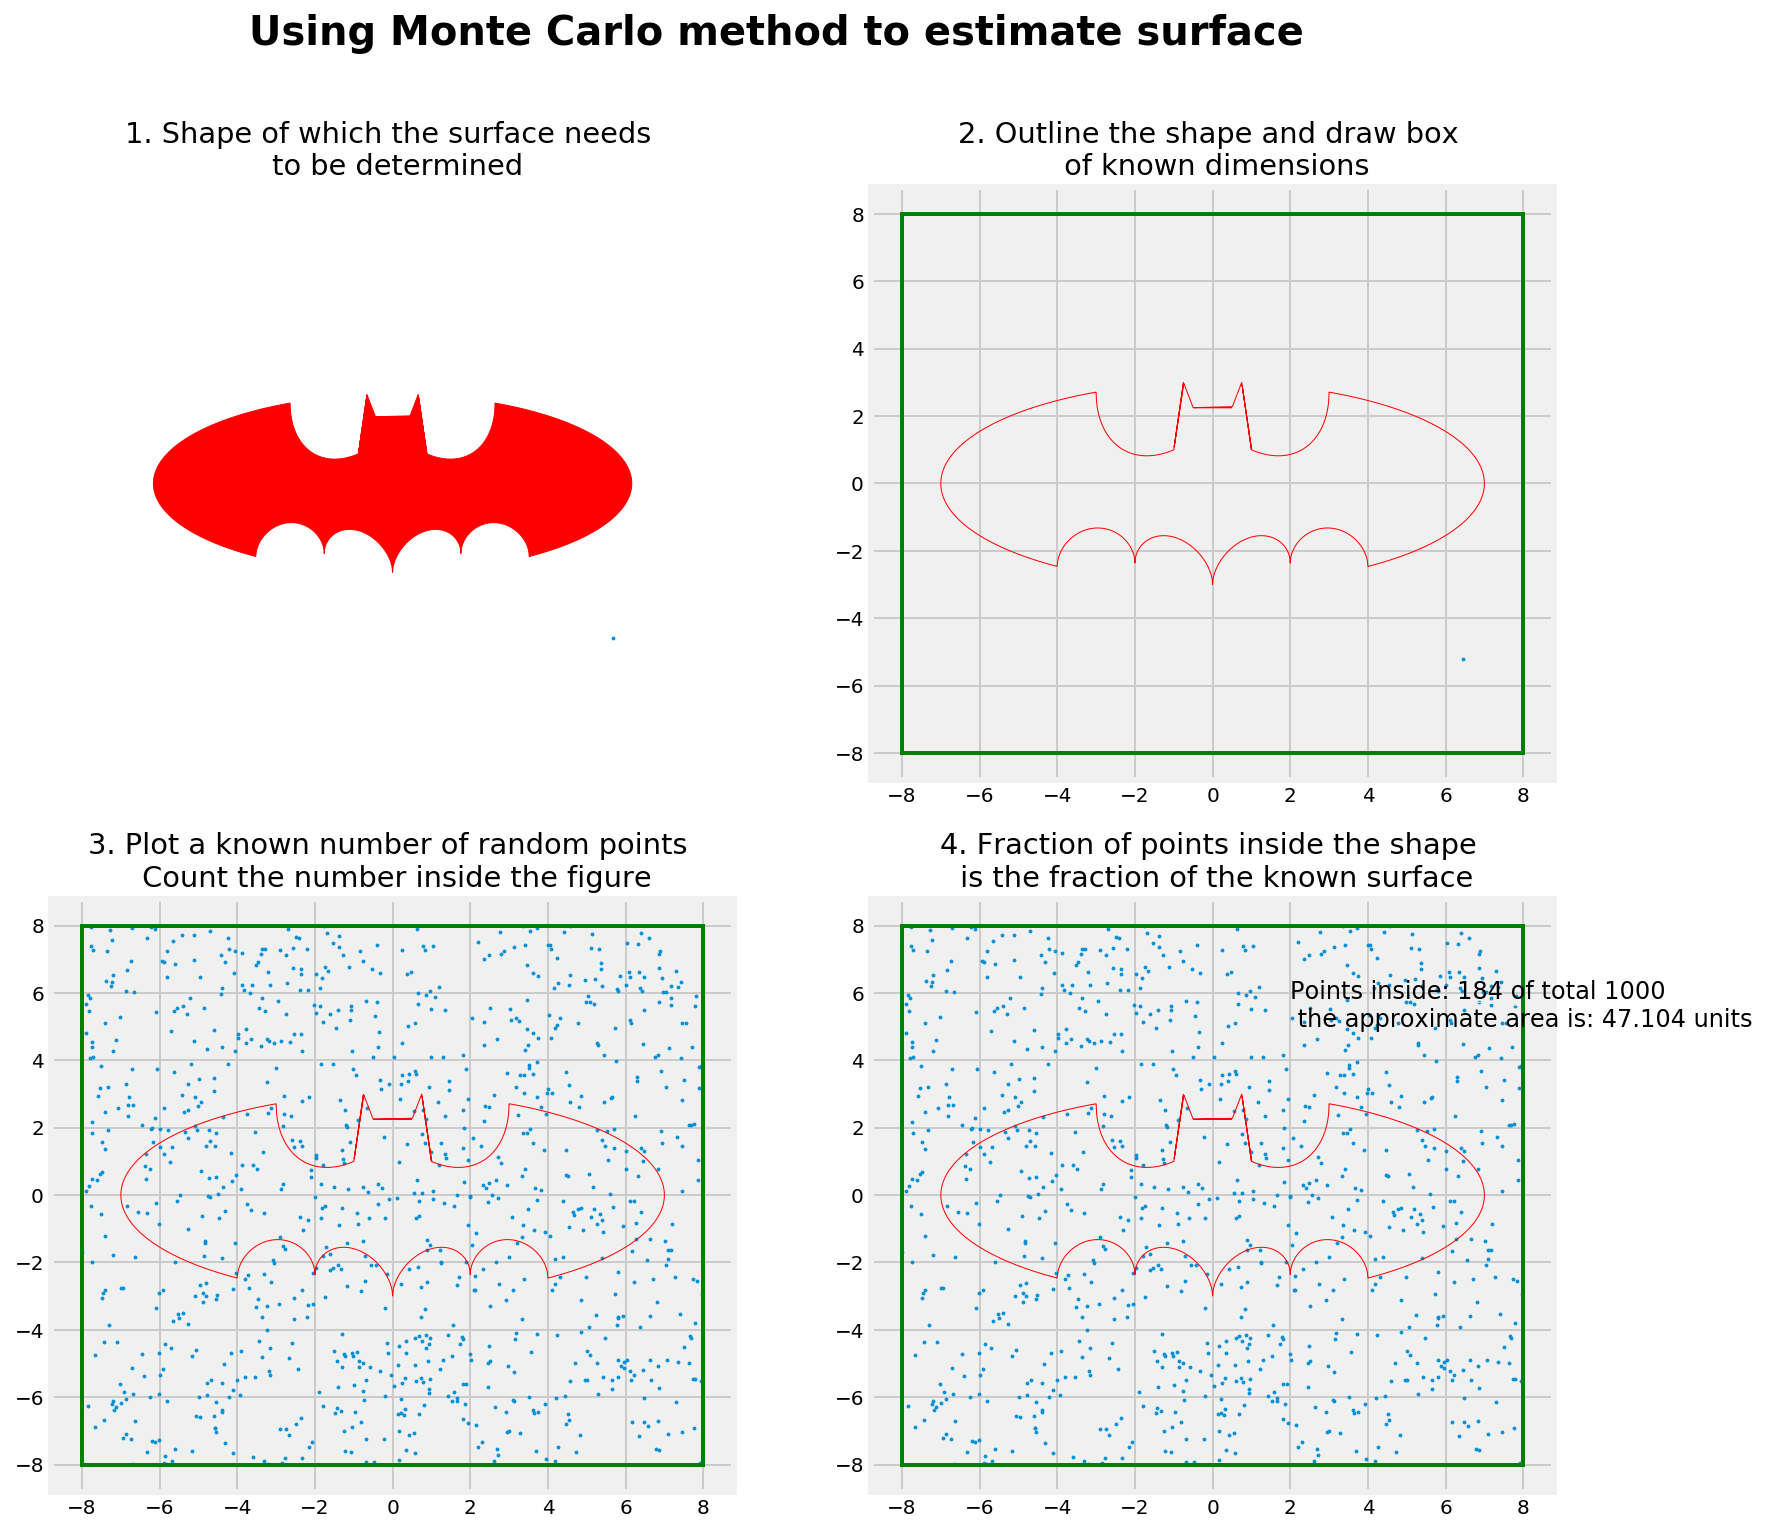

the proportion of points in the area of the figure is :0.184
the approximate area is therefore: 0.184 * 256 = 47.104 units


In [7]:
#create multiple shapes, a shape can only be use once
polygon1= Polygon(ppoints, closed=True, fill=True, fc='red',edgecolor='r')
polygon2= Polygon(ppoints, closed=True, fill=None, edgecolor='r')
polygon3= Polygon(ppoints, closed=True, fill=None, edgecolor='r')
polygon4 = Polygon(ppoints, closed=True, fill=None, edgecolor='r')

rectangle1 = Rectangle(xy=(-8,-8), width=16, height=16, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(-8,-8), width=16, height=16, lw=2, edgecolor='green', fill=False)
rectangle3 = Rectangle(xy=(-8,-8), width=16, height=16, lw=2, edgecolor='green', fill=False)

#set up data
np.random.seed(2019)
npts = 1000
start = -8
end = 8
#number of random points
x = np.random.uniform(start, end, npts)
y = np.random.uniform(start, end, npts)
xy=list(zip(x,y))
points = xy

#determine path of the shape and check number of points 

path = mpltPath.Path(ppoints)
inside = path.contains_points(points)

#determine area
area= (end-start)*(end-start)
areafrac=(sum(inside*1)/len(points))


fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].add_patch(polygon1)
ax[0,0].scatter(x[0], y[0], s=2)
# ax[0,0].patch.set_facecolor('red')
ax[0,0].grid(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_facecolor('white')
ax[0,0].set_xlim([-10,10])
ax[0,0].set_ylim([-10,10])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].set_title('1. Shape of which the surface needs \n to be determined')

ax[0,1].add_patch(polygon2)
ax[0,1].add_patch(rectangle1)
ax[0,1].scatter(x[0], y[0], s=2)
ax[0,1].set_title('2. Outline the shape and draw box \n of known dimensions')

ax[1,0].add_patch(polygon3)
ax[1,0].add_patch(rectangle2)
ax[1,0].scatter(x, y, s=2)
ax[1,0].set_title('3. Plot a known number of random points \n Count the number inside the figure')

ax[1,1].add_patch(polygon4)
ax[1,1].add_patch(rectangle3)
ax[1,1].scatter(x, y, s=2)
ax[1,1].set_title('4. Fraction of points inside the shape \n is the fraction of the known surface')
ax[1,1].annotate(
        f'Points inside: {sum(inside*1)} of total {npts}\n the approximate area is: {areafrac*area} units',
        xy=(4, 6), arrowprops=dict(arrowstyle='->'), xytext=(2, 5), fontsize=12)
# plt.axis('scaled')
plt.suptitle('Using Monte Carlo method to estimate surface', fontsize=20, fontweight='bold')
plt.show()

print(f'the proportion of points in the area of the figure is :{areafrac}')
print(f'the approximate area is therefore: {areafrac} * {area} = {areafrac*area} units')

## What if the points were no so random?

Try first on something we know the answer of

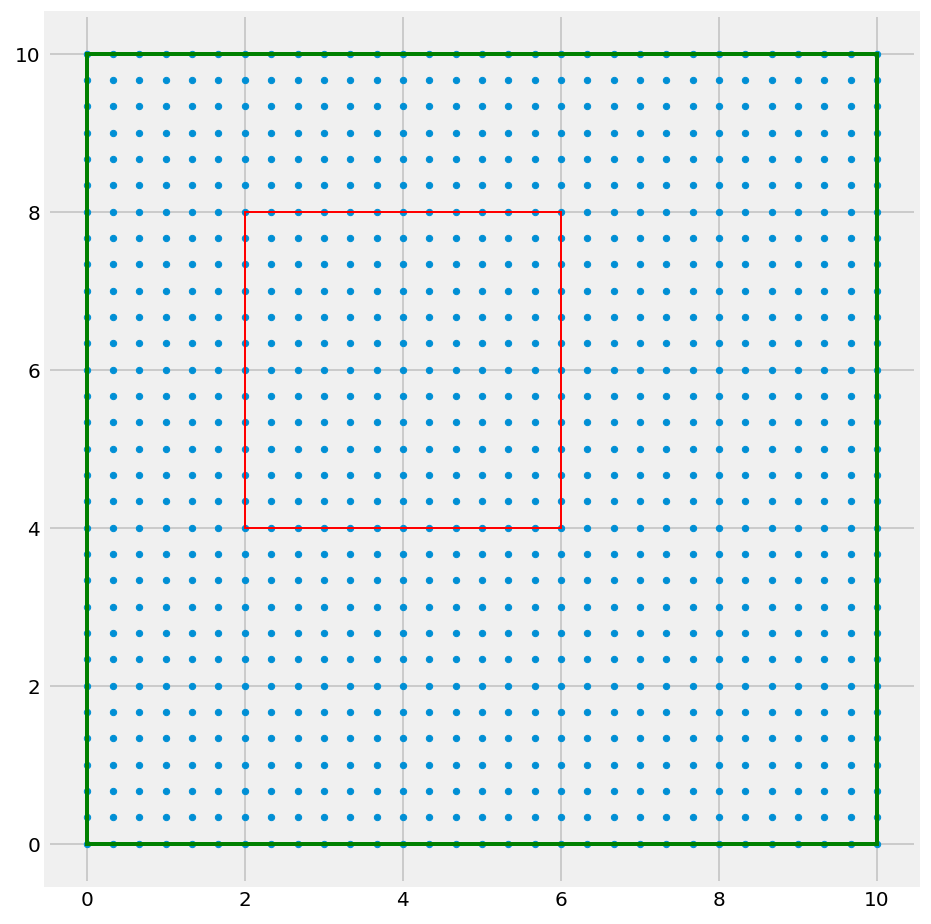

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 1000
start = 0
end = 10
# Create grid of not so  random values first
x = np.linspace(start,end, int(np.sqrt(npts)))
y = np.linspace(start,end, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(xx, yy, s=10)
rectangle = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
ax.add_patch(rectangle)
ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
ax.add_patch(polygon)
plt.axis('scaled')
plt.show()

In [9]:
import matplotlib.path as mpltPath


points = xy

path = mpltPath.Path(ppoints)
inside = path.contains_points(points)
area= (end-start)*(end-start)
areafrac=(sum(inside*1)/len(points))

print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')
# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

an approxmation of the area of the figure is :0.13735691987513007
the approximate area is: 13.735691987513007 units


### Getting into trouble

This is actually a surprising result; possibly something to do with points *on* the figure boundary

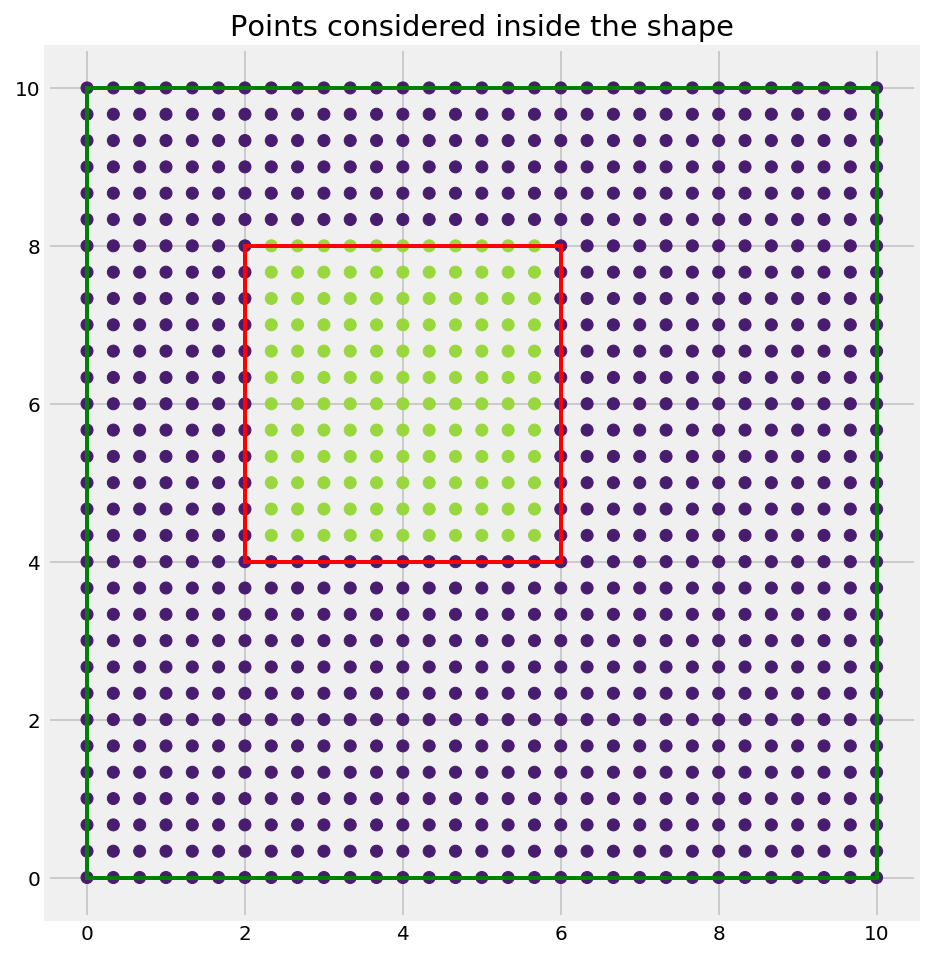

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 1000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid

fig, ax = plt.subplots(figsize=(8,8))

# ax.scatter(xx, yy, s=1)
ax.scatter(xx.flatten(),yy.flatten(), c=inside.astype(float), vmin=-.1,vmax=1.2)
rectangle = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
ax.add_patch(rectangle)
ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)
ax.add_patch(polygon)
ax.set_title('Points considered inside the shape')

# plt.legend()
plt.axis('scaled')
plt.show()

This get weirder: it depends how you draw the path, clockwise or counter clockwise

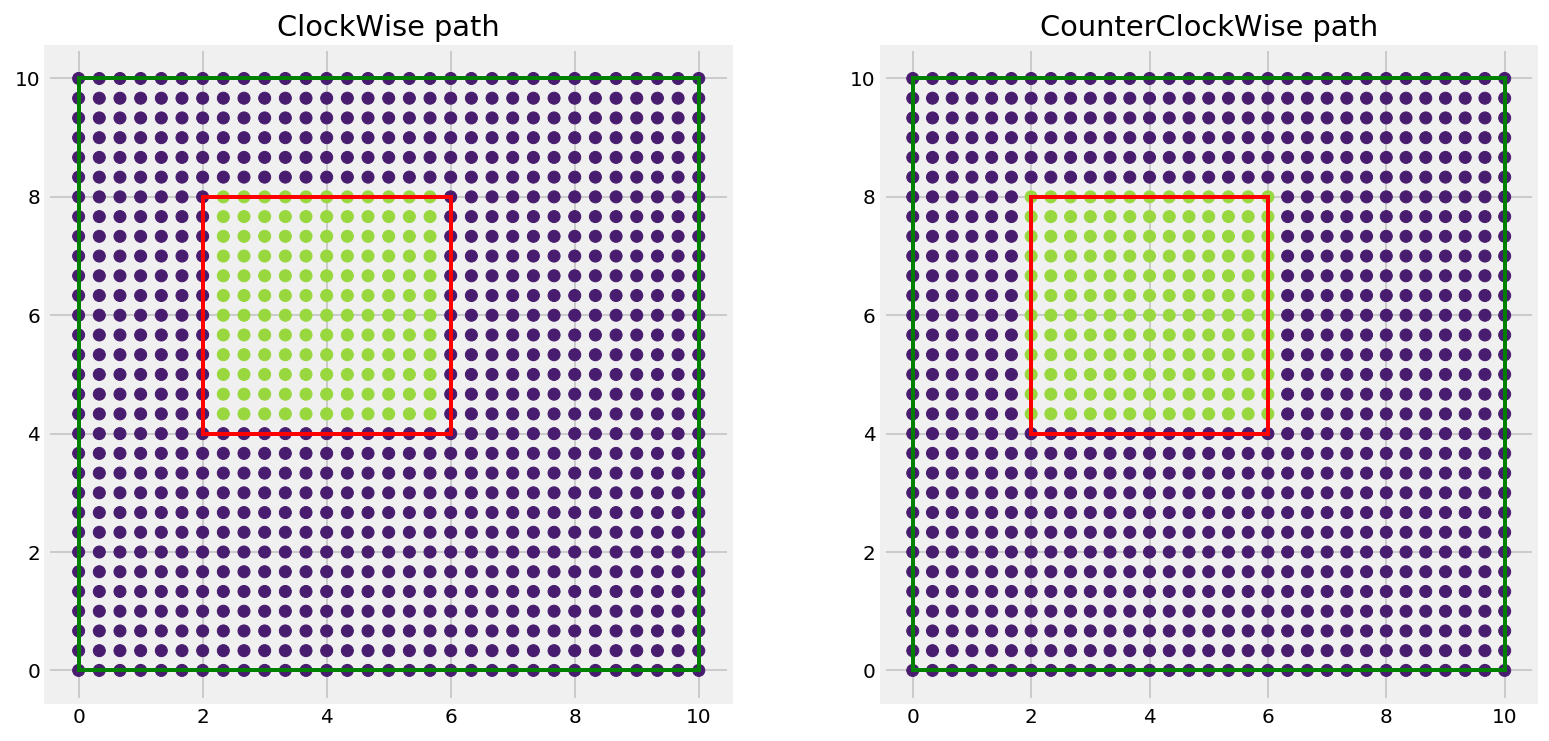

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 1000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid
points = xy

ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon1 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)

rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

path1 = mpltPath.Path(ppoints) #clockwise path
inside1 = path.contains_points(points)

path2 = mpltPath.Path(ppoints[::-1]) #counterclockwise
inside2 = path2.contains_points(points)


fig,ax =plt.subplots(ncols=2, figsize=(12,6))

# # ax.scatter(xx, yy, s=1)
# plot cw path
ax[0].scatter(xx.flatten(),yy.flatten(), c=inside.astype(float), vmin=-.1,vmax=1.2)
ax[0].add_patch(rectangle1)
ax[0].add_patch(polygon1)
ax[0].set_title('Points considered inside the shape')
ax[0].set_title("ClockWise path")

# plot ccw path
ax[1].scatter(xx.flatten(),yy.flatten(), c=inside2.astype(float), vmin=-.1,vmax=1.2)
ax[1].add_patch(rectangle2)
ax[1].add_patch(polygon2)
ax[1].set_title("CounterClockWise path")

plt.axis('scaled')


plt.show()

Turns out that

- **CW**(ClockWise) with 'radius' of 1e-9 (0.0000000001) ***Ex*cludes** points on the boundary
- **CCW** (CounterClockWise) with 'radius' of 1e-9 (0.0000000001) ***In*cludes** points on the boundary

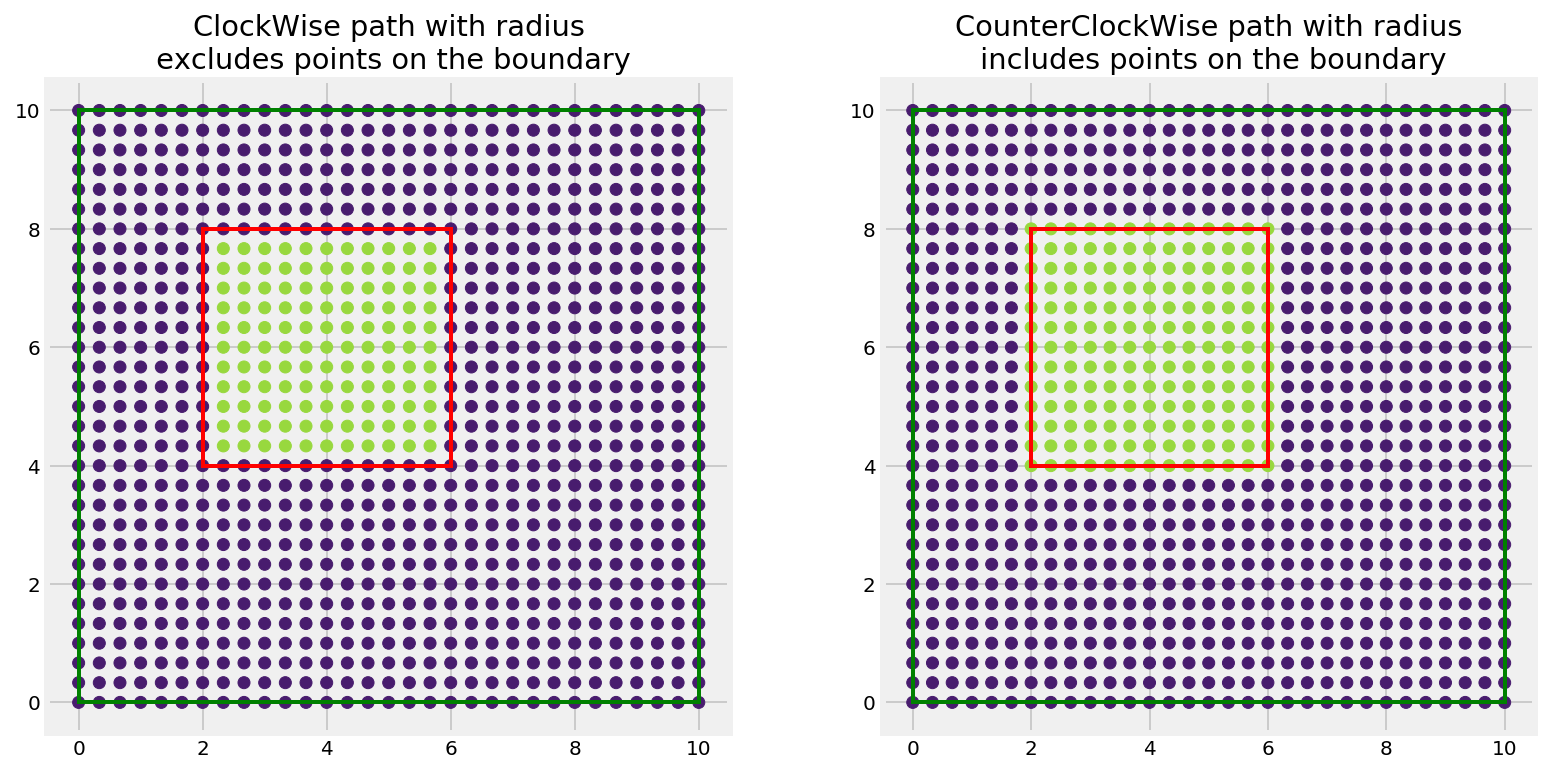

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 1000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid
points = xy

ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon1 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)

rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

#INcluding points ON the path
path1 = mpltPath.Path(ppoints) #clockwise path
inside1 = path.contains_points(points, radius=1e-9)#radius of 0.0000000001

#EXcluding points on the path
path2 = mpltPath.Path(ppoints[::-1]) #counterclockwise
inside2 = path2.contains_points(points, radius=1e-9) #radius of 0.0000000001


fig,ax =plt.subplots(ncols=2, figsize=(12,6))
# plot clockwise path
ax[0].scatter(xx.flatten(),yy.flatten(), c=inside1.astype(float), vmin=-.1,vmax=1.2)
ax[0].add_patch(rectangle1)
ax[0].add_patch(polygon1)
ax[0].set_title('ClockWise path with radius\n excludes points on the boundary')

# plot counterclockwise path
ax[1].scatter(xx.flatten(),yy.flatten(), c=inside2.astype(float), vmin=-.1,vmax=1.2)
ax[1].add_patch(rectangle2)
ax[1].add_patch(polygon2)
ax[1].set_title('CounterClockWise path with radius\n includes points on the boundary')

plt.axis('scaled')

plt.show()

In [13]:
area= (end-start)*(end-start)
areafrac=(sum(inside1*1)/len(points))
print('Clockwise, i.e. exluding points on border')
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

Clockwise, i.e. exluding points on border
an approxmation of the area of the figure is :0.1259105098855359
the approximate area is: 12.59105098855359 units


In [14]:
area= (end-start)*(end-start)
areafrac=(sum(inside2*1)/len(points))
print('Counter Clockwisei.e. inluding points on border')
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

Counter Clockwisei.e. inluding points on border
an approxmation of the area of the figure is :0.17585848074921956
the approximate area is: 17.585848074921955 units


Would more points help, say 10000?:

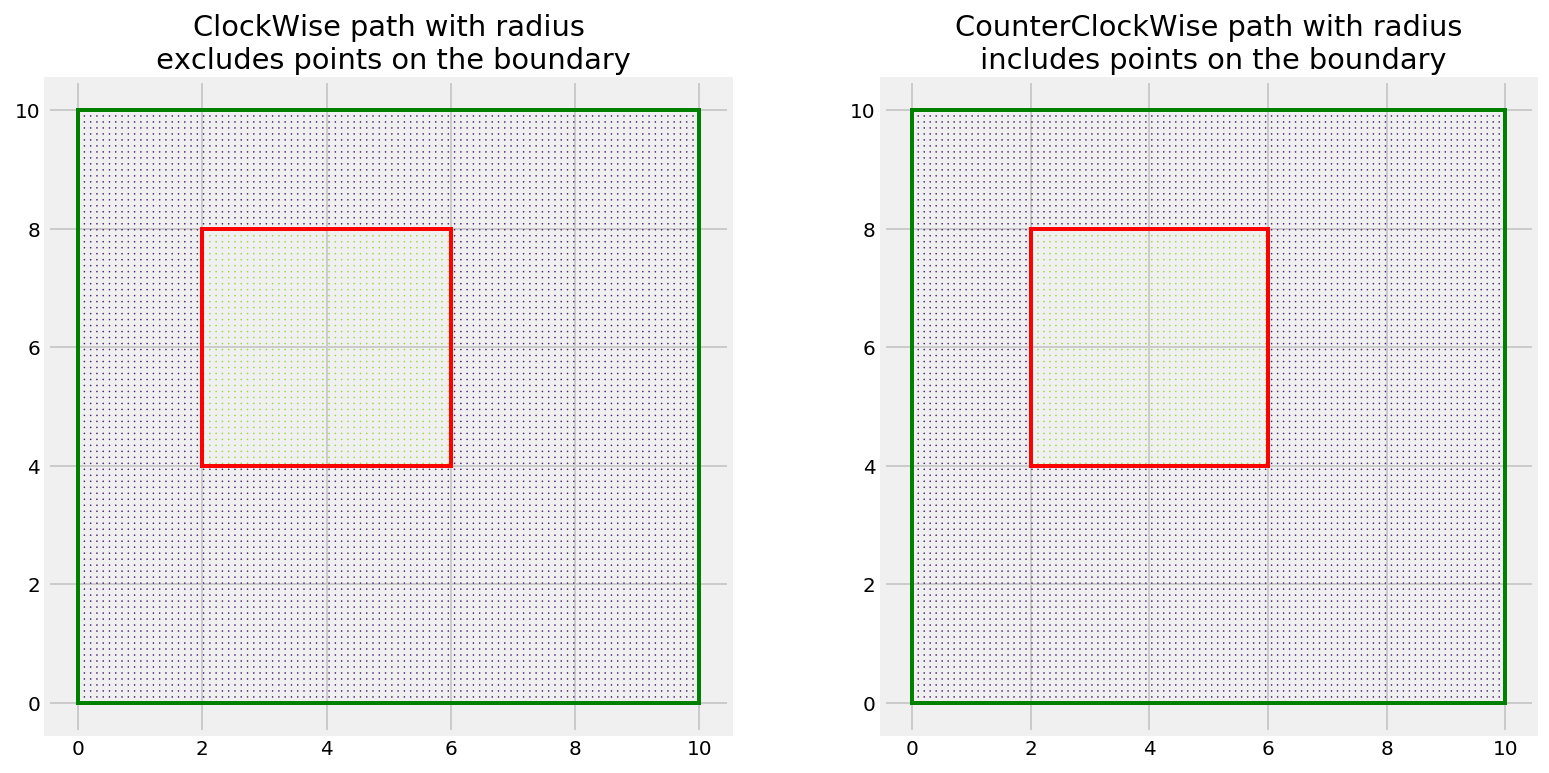

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 10000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid
points = xy

ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon1 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)

rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

#INcluding points ON the path
path1 = mpltPath.Path(ppoints) #clockwise path
inside1 = path1.contains_points(points, radius=1e-9)#radius of 0.0000000001

#EXcluding points on the path
path2 = mpltPath.Path(ppoints[::-1]) #counterclockwise
inside2 = path2.contains_points(points, radius=1e-9) #radius of 0.0000000001



fig,ax =plt.subplots(ncols=2, figsize=(12,6))
# plot clockwise path
ax[0].scatter(xx.flatten(),yy.flatten(), c=inside1.astype(float), vmin=-.1,vmax=1.2, s=.1)
ax[0].add_patch(rectangle1)
ax[0].add_patch(polygon1)
ax[0].set_title('ClockWise path with radius\n excludes points on the boundary')

# plot counterclockwise path
ax[1].scatter(xx.flatten(),yy.flatten(), c=inside2.astype(float), vmin=-.1,vmax=1.2, s=.1)
ax[1].add_patch(rectangle2)
ax[1].add_patch(polygon2)
ax[1].set_title('CounterClockWise path with radius\n includes points on the boundary')

plt.axis('scaled')

plt.show()

In [62]:
area= (end-start)*(end-start)
areafrac=(sum(inside1*1)/len(points))
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

an approxmation of the area of the figure is :0.16
the approximate area is: 16.0 units


In [63]:
area= (end-start)*(end-start)
areafrac=(sum(inside2*1)/len(points))
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

an approxmation of the area of the figure is :0.16
the approximate area is: 16.0 units


Spot on... and actually *no* points on the border

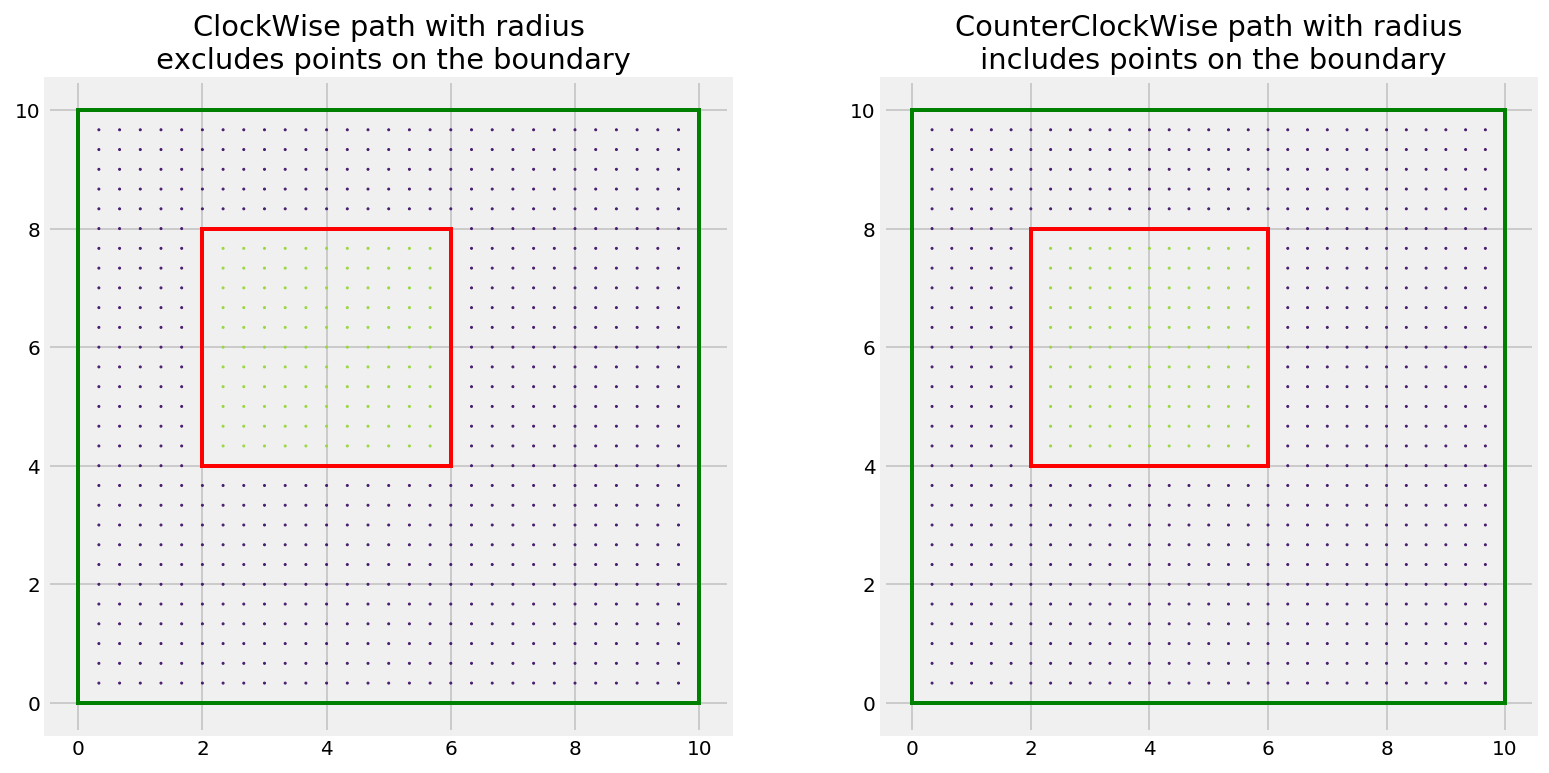

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

np.random.seed(2019)
npts = 1000
start = 0.0001 #ensure no points on the boundary
stop = 10.0001
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

#https://stackoverflow.com/questions/53426968/matrix-in-which-rows-are-coordinates-of-points-of-a-meshgrid
points = xy

ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon1 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r',lw=2)

rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

#INcluding points ON the path
path1 = mpltPath.Path(ppoints) #clockwise path
inside1 = path1.contains_points(points, radius=1e-9)#radius of 0.0000000001

#EXcluding points on the path
path2 = mpltPath.Path(ppoints[::-1]) #counterclockwise
inside2 = path2.contains_points(points, radius=1e-9) #radius of 0.0000000001



fig,ax =plt.subplots(ncols=2, figsize=(12,6))
# plot clockwise path
ax[0].scatter(xx.flatten(),yy.flatten(), c=inside1.astype(float), vmin=-.1,vmax=1.2, s=1)
ax[0].add_patch(rectangle1)
ax[0].add_patch(polygon1)
ax[0].set_title('ClockWise path with radius\n excludes points on the boundary')

# plot counterclockwise path
ax[1].scatter(xx.flatten(),yy.flatten(), c=inside2.astype(float), vmin=-.1,vmax=1.2, s=1)
ax[1].add_patch(rectangle2)
ax[1].add_patch(polygon2)
ax[1].set_title('CounterClockWise path with radius\n includes points on the boundary')

plt.axis('scaled')

plt.show()

In [51]:
area= (end-start)*(end-start)
areafrac=(sum(inside1*1)/len(points))
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

an approxmation of the area of the figure is :0.14984391259105098
the approximate area is: 14.984091572778356 units


In [52]:
area= (end-start)*(end-start)
areafrac=(sum(inside2*1)/len(points))
print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')

an approxmation of the area of the figure is :0.14984391259105098
the approximate area is: 14.984091572778356 units


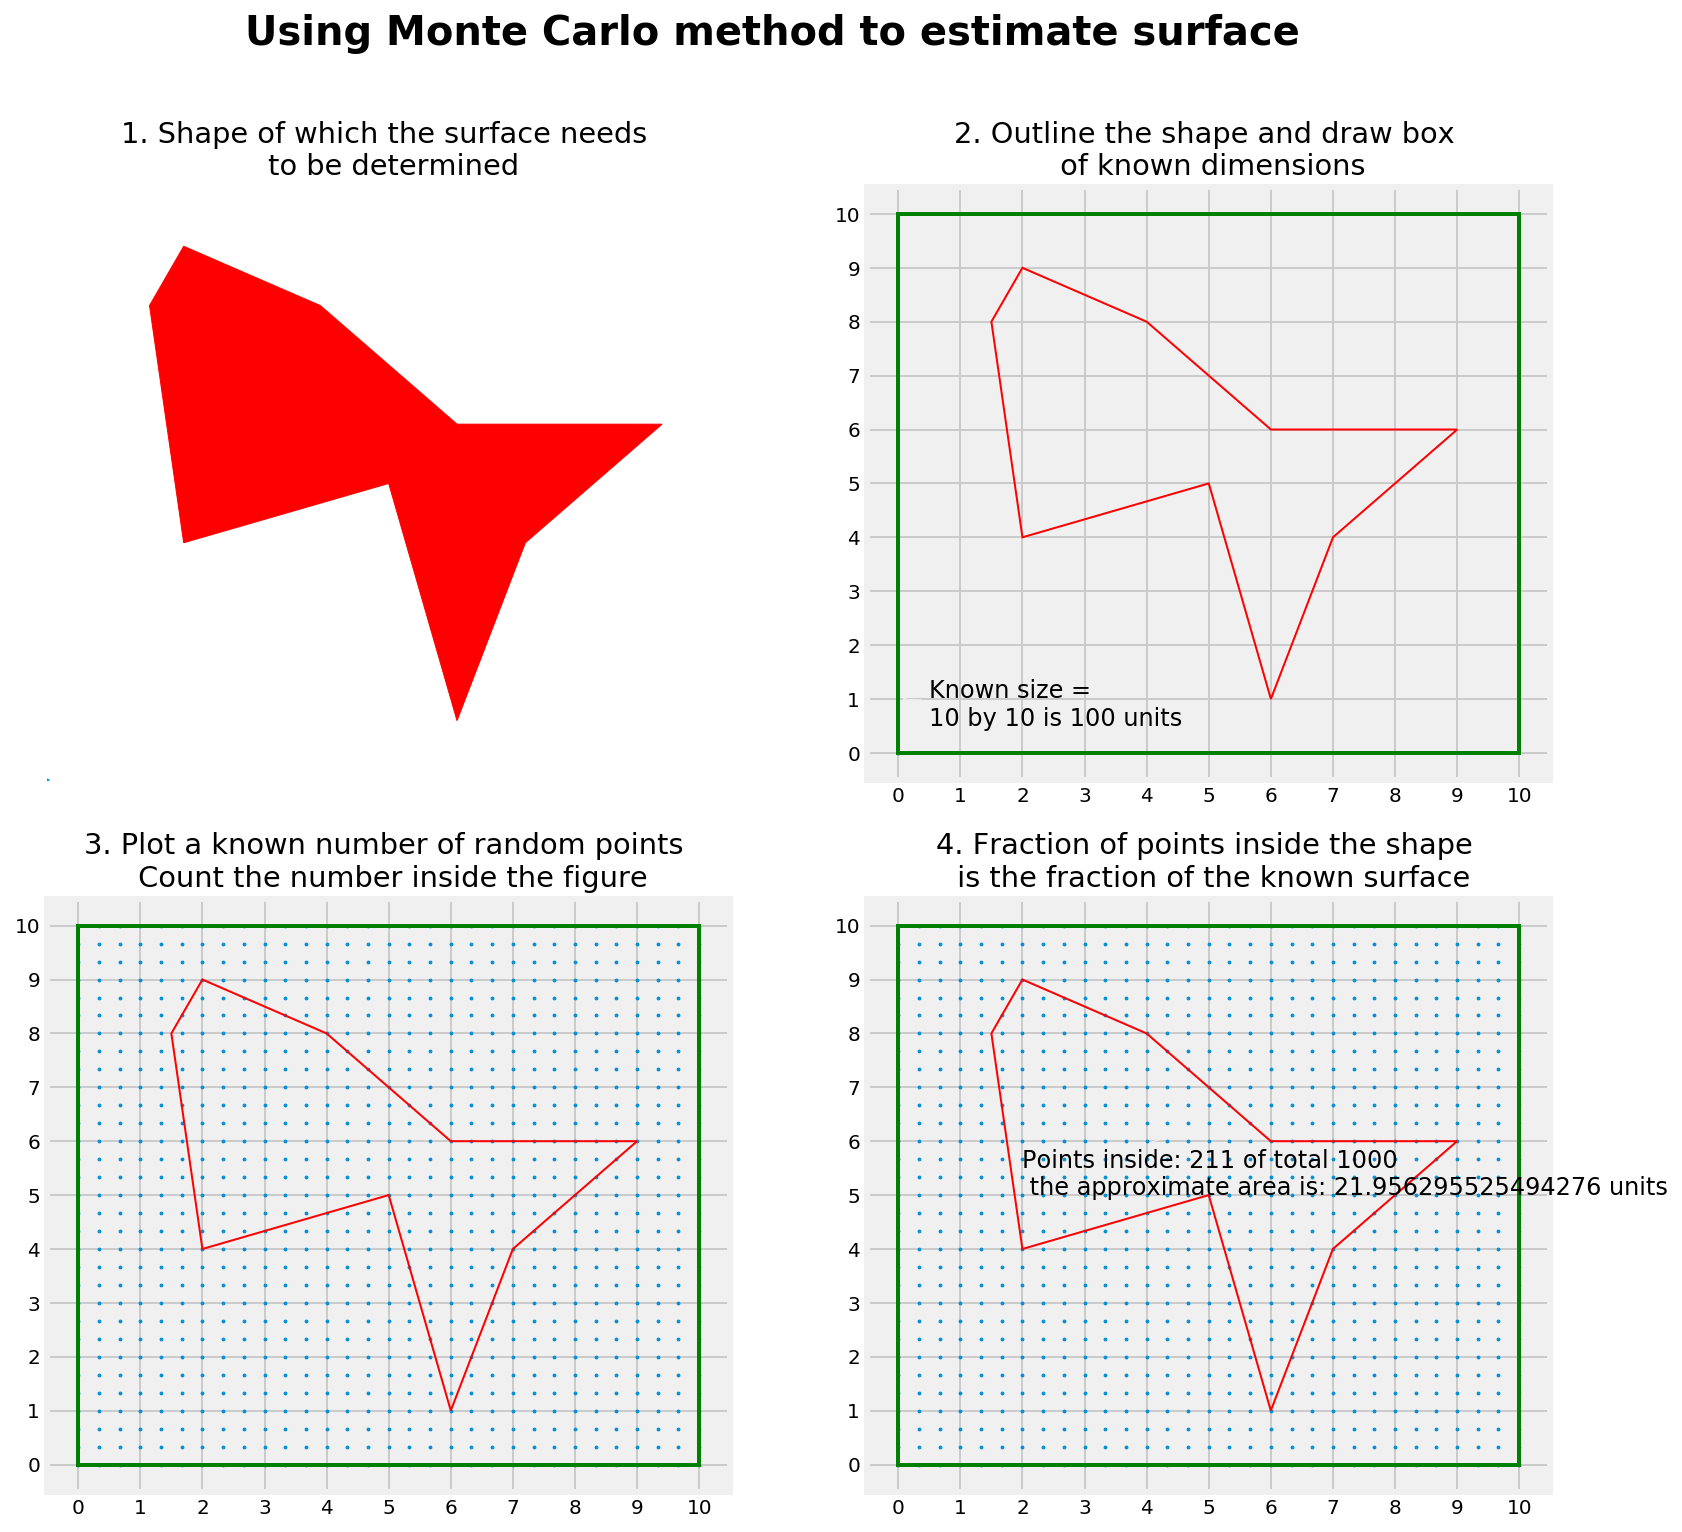

the proportion of points in the area of the figure is :0.21956295525494277
the approximate area is therefore: 21.956295525494276 units


In [55]:
import matplotlib.path as mpltPath
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np

#set up data

np.random.seed(2019)
npts = 1000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
points = xy
# plt.scatter(xy[:,0],xy[:,1]);



#draw the shape (one per subplot required)
ppoints = [[2, 4], [1.5,8],[2, 9], [4,8], [6,6],[9, 6], [7,4], [6, 1], [5,5]]
polygon1= Polygon(ppoints, closed=True, fill=True, fc='red',edgecolor='r')
polygon2= Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon3= Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)
polygon4 = Polygon(ppoints, closed=True, fill=None, edgecolor='r', lw=1)

#draw the box
rectangle1 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle2 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
rectangle3 = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)

#determine path of the shape and check number of points 

path = mpltPath.Path(ppoints[::-1]) #counterclockwise
inside = path.contains_points(points, radius=1e-9)

#determine area
area= (end-start)*(end-start)
areafrac=(sum(inside*1)/len(points))

# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].add_patch(polygon1)
ax[0,0].scatter(x[0], y[0], s=2)
# ax[0,0].patch.set_facecolor('red')
ax[0,0].grid(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_facecolor('white')
ax[0,0].set_xlim([0,10])
ax[0,0].set_ylim([0,10])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].set_title('1. Shape of which the surface needs \n to be determined')

ax[0,1].add_patch(polygon2)
ax[0,1].add_patch(rectangle1)
ax[0,1].scatter(x[0], y[0], s=2)
ax[0,1].set_title('2. Outline the shape and draw box \n of known dimensions')
ax[0,1].set_xticks([xt for xt in range (0,11)])
ax[0,1].set_yticks([yt for yt in range (0,11)])
ax[0,1].annotate(
        f'Known size = \n{end-start} by {end-start} is {(end-start)*(end-start)} units',
        xy=(0, 1), arrowprops=dict(arrowstyle='->'), xytext=(.5, .5), fontsize=12)

ax[1,0].add_patch(polygon3)
ax[1,0].add_patch(rectangle2)
ax[1,0].scatter(xx, yy, s=2)
ax[1,0].set_xticks([xt for xt in range (0,11)])
ax[1,0].set_yticks([yt for yt in range (0,11)])

ax[1,0].set_title('3. Plot a known number of random points \n Count the number inside the figure')

ax[1,1].add_patch(polygon4)
ax[1,1].add_patch(rectangle3)
ax[1,1].scatter(xx, yy, s=2)
ax[1,1].set_xticks([xt for xt in range (0,11)])
ax[1,1].set_yticks([yt for yt in range (0,11)])
ax[1,1].set_title('4. Fraction of points inside the shape \n is the fraction of the known surface')
ax[1,1].annotate(
        f'Points inside: {sum(inside*1)} of total {npts}\n the approximate area is: {areafrac*area} units',
        xy=(4, 6), arrowprops=dict(arrowstyle='->'), xytext=(2, 5), fontsize=12)
# plt.axis('scaled')
plt.suptitle('Using Monte Carlo method to estimate surface', fontsize=20, fontweight='bold')
plt.show()

print(f'the proportion of points in the area of the figure is :{areafrac}')
print(f'the approximate area is therefore: {areafrac*area} units')

## Conclusion

With a Monte Carlo method, the randomness allows to get to an approximation quickly, albeit with a high variance. I.e. results may vary but are on average close to the truth.

When the random element is dropped, trouble is around the corner. These approximations will show a high bias, i.e. consistent and wrong. 

With a high number of points a grid approach seems to lead to better results more quickly, but this defeats the purpose of the exercise: with little effort a good approximation.

With high numbers of points the 2 methods actually converge on the result.



# Appendix

### Generic code

In [57]:
import matplotlib
#INcluding points ON the path
path1 = matplotlib.path.Path(ppoints, closed=True)#counter clockwise
inside1 = path.contains_points(points, radius=1e-9)#

#EXcluding points on the path
path2 = matplotlib.path.Path(ppoints[::-1], closed=True)#clockwise
inside2 = path2.contains_points(points, radius=1e-9)

#https://github.com/matplotlib/matplotlib/issues/9704

### Getting points of a figure patch

[[ 4.59242550e-17  7.50000000e-01]
 [-2.31762746e-01  7.13292387e-01]
 [-4.40838939e-01  6.06762746e-01]
 [-6.06762746e-01  4.40838939e-01]
 [-7.13292387e-01  2.31762746e-01]
 [-7.50000000e-01  9.18485099e-17]
 [-7.13292387e-01 -2.31762746e-01]
 [-6.06762746e-01 -4.40838939e-01]
 [-4.40838939e-01 -6.06762746e-01]
 [-2.31762746e-01 -7.13292387e-01]
 [-1.37772765e-16 -7.50000000e-01]
 [ 2.31762746e-01 -7.13292387e-01]
 [ 4.40838939e-01 -6.06762746e-01]
 [ 6.06762746e-01 -4.40838939e-01]
 [ 7.13292387e-01 -2.31762746e-01]
 [ 7.50000000e-01 -1.83697020e-16]
 [ 7.13292387e-01  2.31762746e-01]
 [ 6.06762746e-01  4.40838939e-01]
 [ 4.40838939e-01  6.06762746e-01]
 [ 2.31762746e-01  7.13292387e-01]
 [ 2.29621275e-16  7.50000000e-01]]


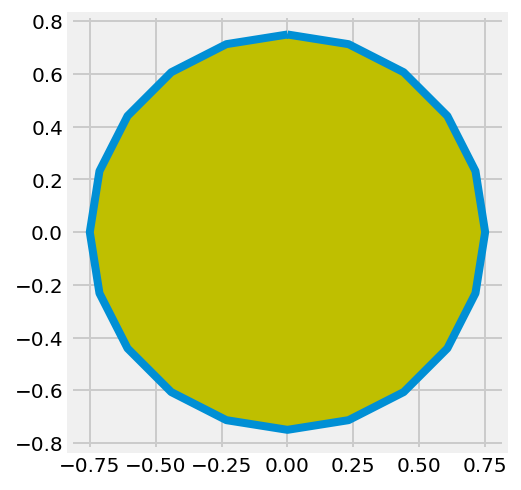

In [91]:
#https://stackoverflow.com/questions/50248902/get-the-coordinates-from-circlepolygon-in-matplotlib-patches

import matplotlib.pyplot as plt
from matplotlib.patches import CirclePolygon

circle = CirclePolygon((0, 0), radius = 0.75, fc = 'y')
plt.gca().add_patch(circle)

verts = circle.get_path().vertices
trans = circle.get_patch_transform()
points = trans.transform(verts)
print(points)

plt.plot(points[:,0],points[:,1])
plt.axis('scaled')
plt.show()

### Example of complexity of MatPlotLib

Originally tried to the points *off* the border by rotating the square...being too lazy to actually calculate the new coordinates. Turns out that under the hood the original object is kept and the transformation is shown. Not really WYSIWYG :-)

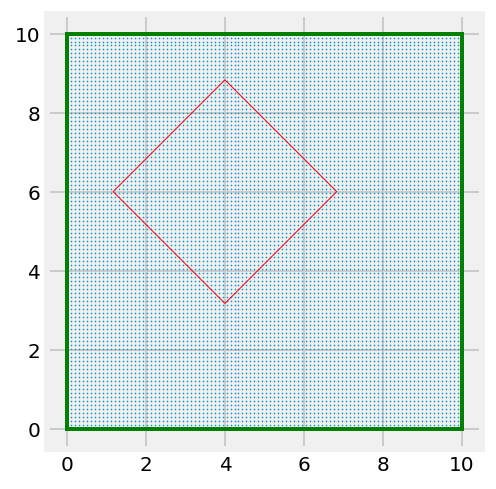

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Rectangle, Polygon
import numpy as np
import matplotlib as mpl


np.random.seed(2019)
npts = 10000
start = 0
stop = 10
# Create grid not random values first
x = np.linspace(start,stop, int(np.sqrt(npts)))
y = np.linspace(start,stop, int(np.sqrt(npts)))

xx, yy = np.meshgrid(x, y)

# Get the coordinatesof the points:
xy = np.vstack([xx.ravel(), yy.ravel()]).T # It took me 2 hours to find this 
# plt.scatter(xy[:,0],xy[:,1]);

points = xy
fig, ax = plt.subplots()


ax.scatter(xx, yy, s=.1)
rectangle = Rectangle(xy=(0,0), width=10, height=10, lw=2, edgecolor='green', fill=False)
ax.add_patch(rectangle)
ppoints = [[2, 4], [2,8],[6,8],[6,4]]
polygon1 = Polygon(ppoints, closed=True, fill=None, edgecolor='r')
polygon2 = Polygon(ppoints, closed=True, fill=None, edgecolor='r')
t2 = mpl.transforms.Affine2D().rotate_deg_around(4,6,45) + ax.transData
polygon2.set_transform(t2)
ax.add_patch(polygon2)
plt.axis('scaled')

plt.show()

[[2. 4.]
 [2. 8.]
 [6. 8.]
 [6. 4.]
 [2. 4.]]


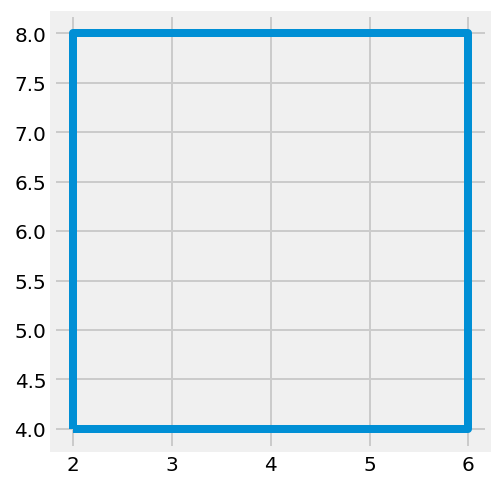

In [28]:
verts = polygon2.get_path().vertices
trans = polygon2.get_patch_transform()
points = trans.transform(verts)
print(points)

plt.plot(points[:,0],points[:,1])
plt.axis('scaled')
plt.show()

In [88]:
import matplotlib.path as mpltPath


points = xy

path = polygon2.get_path(
inside = path.contains_points(points, radius=1e9)
area= (end-start)*(end-start)
areafrac=(sum(inside*1)/len(points))

print(f'an approxmation of the area of the figure is :{areafrac}')
print(f'the approximate area is: {areafrac*area} units')
# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

TypeError: 'Path' object is not subscriptable

### DIY meshgrid

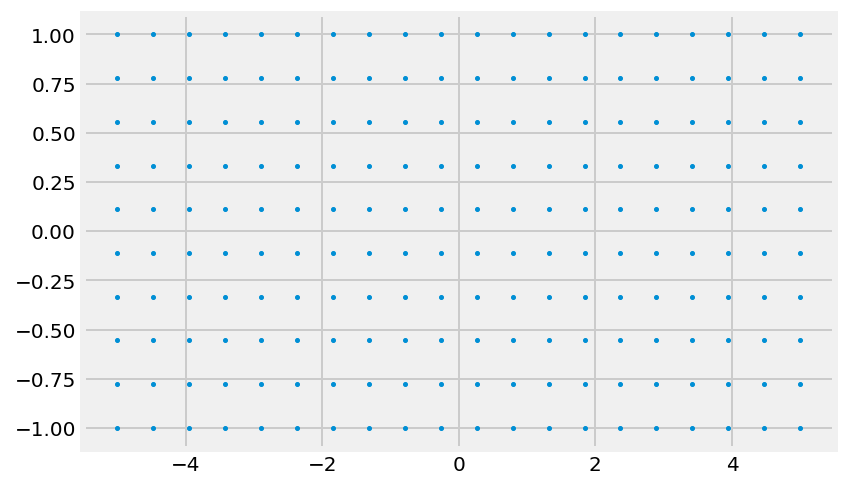

In [87]:
from itertools import product
import numpy as np

x = np.linspace(-5, 5, 20)
y = np.linspace(-1, 1, 10)
xy = np.array(list(product(x,y)))
# print(xy
plt.scatter(xy[:, 0],xy[:, 1], s=4)

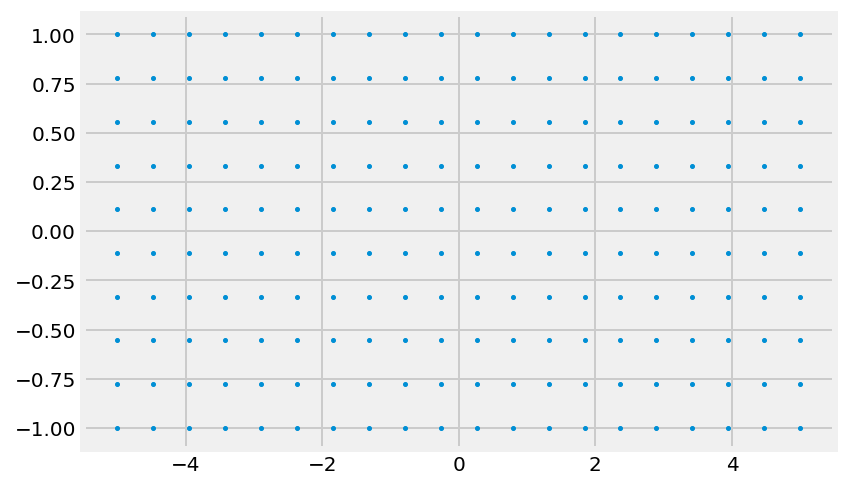

In [88]:
import numpy as np

x = np.linspace(-5, 5, 20)
y = np.linspace(-1, 1, 10)
xy = np.empty((len(x) * len(y), 2))
xy[:, 0] = np.repeat(x, len(y))
xy[:, 1] = np.tile(y, len(x))
plt.scatter(xy[:, 0],xy[:, 1], s=4)